In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
milk = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day10\milk.csv", index_col =0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
#scaling the data
scaler  = StandardScaler().set_output(transform='pandas')
scaler.fit(milk)
milkscaled=scaler.transform(milk)

In [4]:
pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(milkscaled)
#PCA columns are orthogonal to each other
principalComponents.corr()

,pca0,pca1,pca2,pca3,pca4
pca0,1.000000e+00,-7.659716e-17,1.350210e-16,-1.436333e-17,0.000000e+00
pca1,-7.659716e-17,1.000000e+00,1.706851e-16,0.000000e+00,1.187218e-16
pca2,1.350210e-16,1.706851e-16,1.000000e+00,-1.945009e-16,2.238765e-16
pca3,-1.436333e-17,0.000000e+00,-1.945009e-16,1.000000e+00,2.226244e-17
pca4,0.000000e+00,1.187218e-16,2.238765e-16,2.226244e-17,1.000000e+00


In [5]:
print(principalComponents.var())
#variance of PC Columns are eighen values of var - cov matrix
values, vectors = np.linalg.eig(milkscaled.cov())

print(pca.explained_variance_)
tot_var = np.sum(pca.explained_variance_)
print(pca.explained_variance_ / tot_var)
# or
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_ * 100)
print(np.cumsum(pca.explained_variance_ratio_ * 100))

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64
[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[0.77575905 0.1774795  0.02578385 0.01971621 0.0012614 ]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]
[ 77.57590469  95.32385438  97.90223934  99.87386037 100.        ]


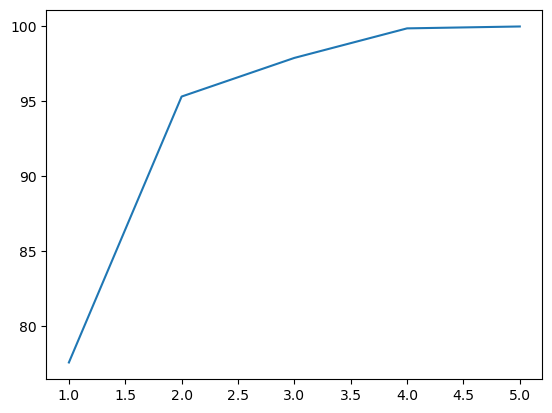

In [6]:
ys = np.cumsum(pca.explained_variance_ratio_ * 100)
xs = np.arange(1, 6)
plt.plot(xs, ys);

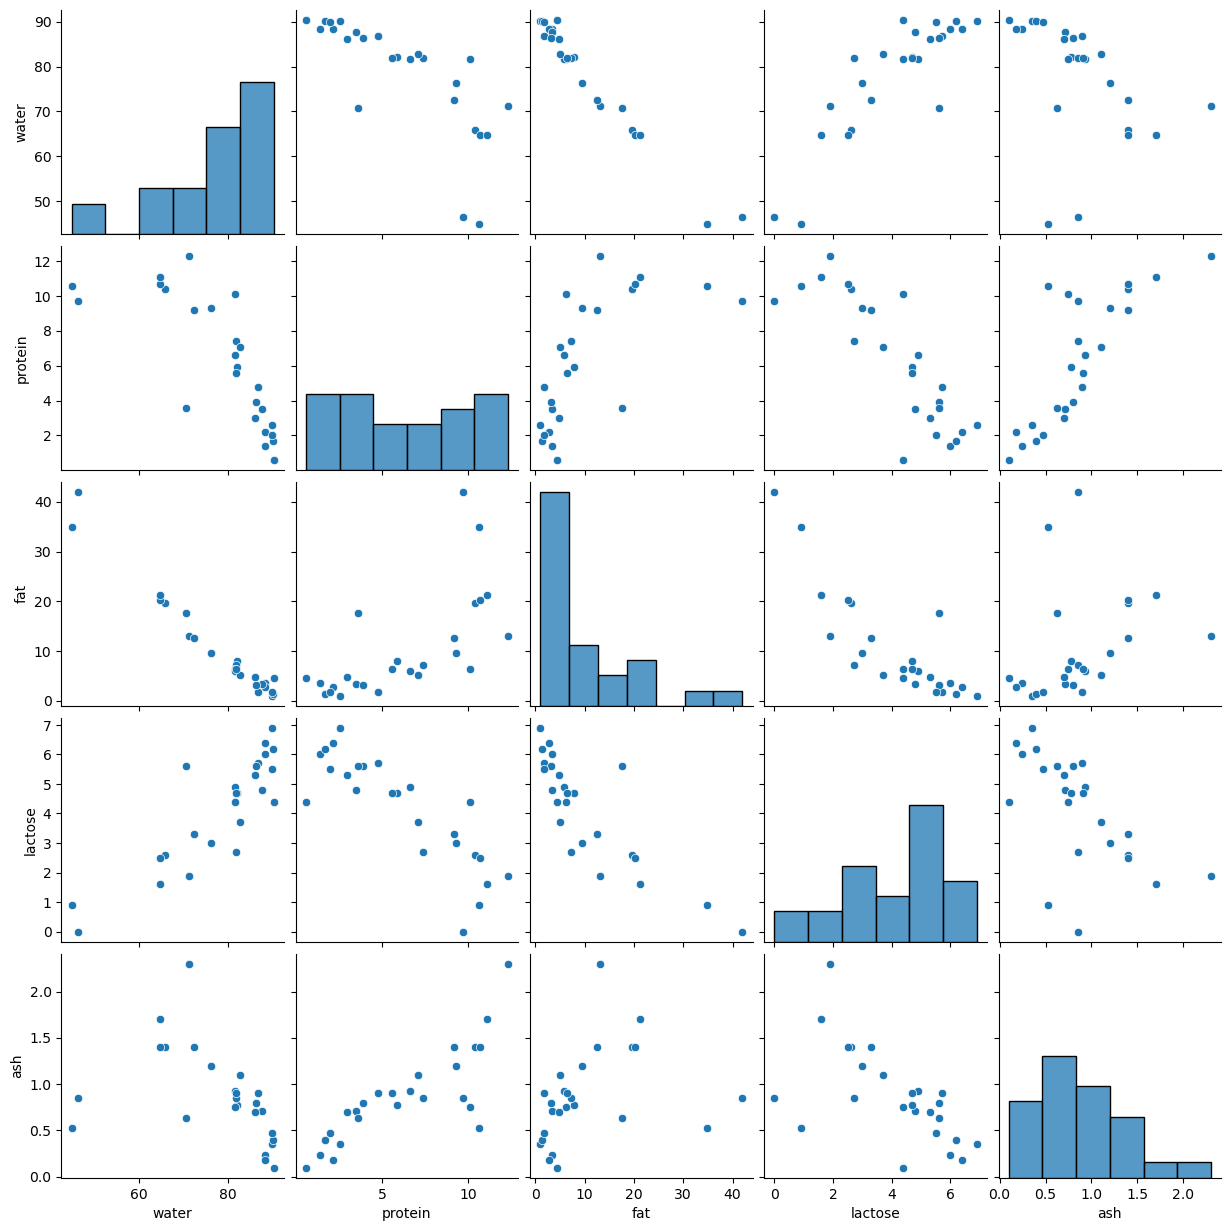

In [8]:
sns.pairplot(milk)